<h1 style = "color:turqouise; font-family: Times New Roman"> Tau_slice </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Ucitavamo podatke
data0 = np.fromfile("tau_slice_1.000.138200", dtype = "float32")
data1 = np.fromfile("tau_slice_1.000.138201", dtype = "float32")
data2 = np.fromfile("tau_slice_1.000.138202", dtype = "float32")
data3 = np.fromfile("tau_slice_1.000.138203", dtype = "float32")
data4 = np.fromfile("tau_slice_1.000.138204", dtype = "float32")
data5 = np.fromfile("tau_slice_1.000.138205", dtype = "float32")
data6 = np.fromfile("tau_slice_1.000.138206", dtype = "float32")
data7 = np.fromfile("tau_slice_1.000.138207", dtype = "float32")
data8 = np.fromfile("tau_slice_1.000.138208", dtype = "float32")
data9 = np.fromfile("tau_slice_1.000.138209", dtype = "float32")

In [3]:
# Uzimamo sta nam je potrebno
cube0 = data0[4:].reshape(11, 2048, 2048)
cube1 = data1[4:].reshape(11, 2048, 2048)
cube2 = data2[4:].reshape(11, 2048, 2048)
cube3 = data3[4:].reshape(11, 2048, 2048)
cube4 = data4[4:].reshape(11, 2048, 2048)
cube5 = data5[4:].reshape(11, 2048, 2048)
cube6 = data6[4:].reshape(11, 2048, 2048)
cube7 = data7[4:].reshape(11, 2048, 2048)
cube8 = data8[4:].reshape(11, 2048, 2048)
cube9 = data9[4:].reshape(11, 2048, 2048)
# 0 (1) ne znamo sta je
# 1 (2) v_z
# 2 (3) v_x
# 3 (4) v_y
# 4 (5) ne znamo sta je, 1e12??
# 5 (6) B_z
# 6 (7) B_x
# 7 (8) B_y
# 8 (9) temperatura T
# 9 (10) ne znamo sta je yet
# 10 (11) ne znamo sta je yet

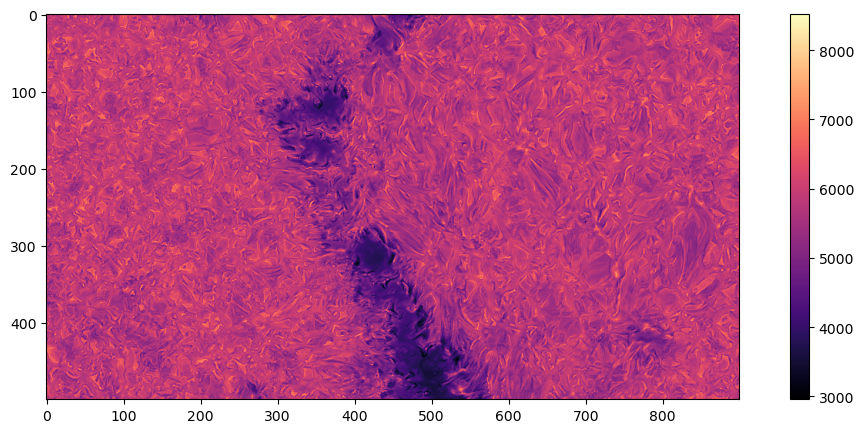

In [4]:
plt.figure(figsize=[13,5])
plt.imshow(cube0[8, 400:900, :900],cmap = 'magma')
plt.colorbar()

In [5]:
cube0.shape


(11, 2048, 2048)

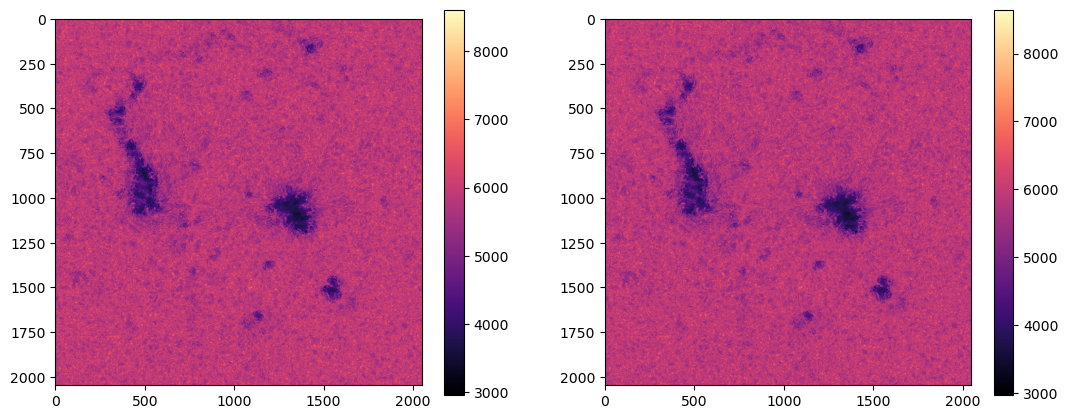

In [6]:
# Pokusajmo da primenimo poznat postupak na ove podatke
# Prvo cemo koristiti T, a posle cemo i magnetno polje
# Plotujemo u pocetnom trenutku i nakon 4 sekunde
plt.figure(figsize=[13,5])
plt.subplot(121)
plt.imshow(cube0[8,:,:], cmap = 'magma')
plt.colorbar()
plt.subplot(122)
plt.imshow(cube4[8,:,:], cmap = 'magma')
plt.colorbar()


In [4]:
import pyflct

In [8]:
print(cube0[8:,:])

[[[6.32582520e+03 7.00048926e+03 6.42241846e+03 ... 6.13421875e+03
   6.20279199e+03 5.77480127e+03]
  [5.81300586e+03 6.77683398e+03 6.72160791e+03 ... 6.29178711e+03
   6.33772119e+03 5.51205908e+03]
  [6.45222363e+03 6.57388818e+03 6.58341992e+03 ... 6.20888965e+03
   6.01840088e+03 5.49389844e+03]
  ...
  [5.88864160e+03 5.67525684e+03 6.11778516e+03 ... 5.93583105e+03
   6.17434180e+03 6.25217334e+03]
  [5.88941016e+03 5.33182764e+03 5.65806885e+03 ... 6.19721094e+03
   6.26025781e+03 5.88665723e+03]
  [6.44008984e+03 6.51969580e+03 5.67171191e+03 ... 6.18345166e+03
   6.04699902e+03 5.99601074e+03]]

 [[8.52849531e+04 8.22402266e+04 7.60589688e+04 ... 9.73813125e+04
   9.78415469e+04 9.09160391e+04]
  [7.85050312e+04 8.32032109e+04 8.20596406e+04 ... 1.01504555e+05
   9.80412578e+04 8.09339609e+04]
  [7.80540547e+04 8.34158438e+04 8.23725938e+04 ... 1.05116922e+05
   9.48839297e+04 7.67616406e+04]
  ...
  [1.14029531e+05 1.09581328e+05 1.12203859e+05 ... 1.04828070e+05
   1.07536

In [9]:
print(cube0[2,:,:])

[[-179451.72   -132002.11   -127900.9    ... -101518.83    -46802.086
  -122598.31  ]
 [-110766.66   -123053.35     -8283.178  ...   68310.79     88453.97
    45365.547 ]
 [ -68138.88    -27712.707    61683.406  ...  251056.48    149538.28
    -1712.4458]
 ...
 [-314274.2    -325256.78   -240761.44   ...  214406.27    128987.46
   -23867.469 ]
 [-339064.6    -372085.     -334674.47   ...  162045.17     19508.19
  -248749.72  ]
 [-286609.3    -253487.73   -246267.83   ...   12844.632  -149080.36
  -329728.97  ]]


In [ ]:
# Preliminarno odredjujemo brzine 
# Koristimo pyflct 
image1 = cube0[8,:,:]
image2 = cube4[8,:,:]


vel_x, vel_y, vm = pyflct.flct(image1, image2, 1, 1*16, 4.0) 
print(vel_x)

In [8]:
image1 = cube0[8,400:,400:]
image2 = cube4[8,400:,400:]


vel_x, vel_y, vm = pyflct.flct(image1, image2, 1, 1*16, 4.0) 
print(vel_x)

flct: nominal sliding box size = 16
flct: progress  i = 55[[-0.88075211 -0.92668916 -0.91497113 ... -0.25451011 -0.31205624
  -0.33286333]
 [-0.83395844 -0.85990317 -0.81058176 ... -0.32819841 -0.38592341
  -0.38645937]
 [-0.77008757 -0.75258826 -0.66657129 ... -0.37347318 -0.41483797
  -0.3945867 ]
 ...
 [-0.92673234 -1.14130927 -1.33605034 ...  0.05378711 -0.00886904
  -0.01306281]
 [-0.86350683 -1.02871782 -1.20659383 ... -0.15212529 -0.20486213
  -0.188335  ]
 [-0.83605686 -0.95769027 -1.09759929 ... -0.33163862 -0.37751247
  -0.34610268]]


flct: p

flct: mean value of gamma^2/sigma^2 = 0.0820514

flct: finished


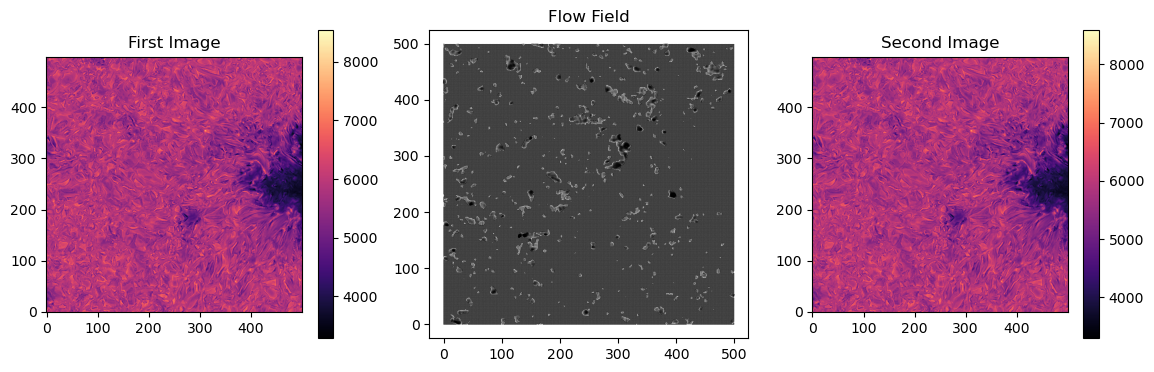

In [9]:
i_start = 400
i_end = 900
j_start = 400
j_end = 900

# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image1[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end])
ax2.set_title("Flow Field")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image2[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image")
plt.colorbar()

In [8]:
import time


In [ ]:
# Preliminarno odredjujemo brzine 
# Koristimo pyflct 
image1 = cube0[8]
image2 = cube4[8]

start_time = time.time()
vel_x, vel_y, vm = pyflct.flct(image1, image2, 1, 1*16, 4.0) 
print(time.time())
end_time = time.time()
execution_time = start_time - end_time
print("Execution time:",execution_time)

flct: nominal sliding box size = 16
flct: mean value of gamma^2/sigma^2 = 0.174346

flct: finished


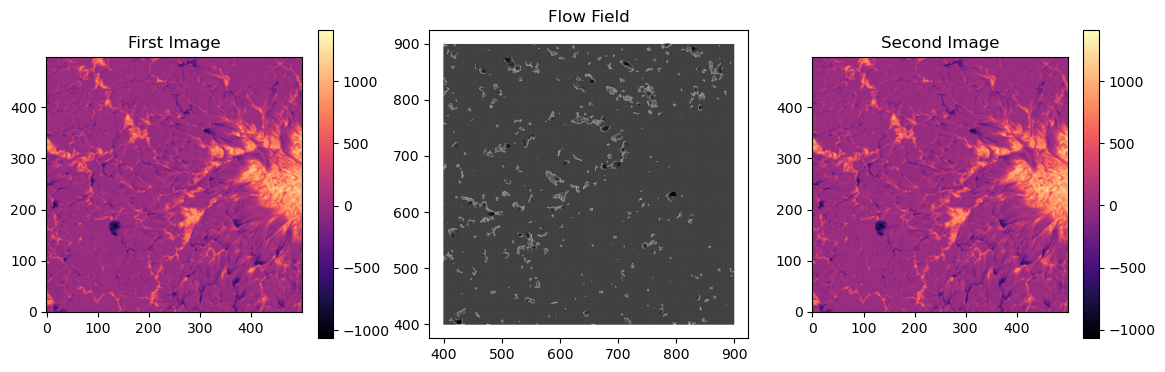

In [10]:
image1 = cube0[5, 400:, 400:] # magnetno polje
image2 = cube4[5, 400:, 400:]
vel_x, vel_y, vm = pyflct.flct(image1, image2, 1, 1*16, 4.0) 
i_start = 400
i_end = 900
j_start = 400
j_end = 900

# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 2500, 1)
Y = np.arange(0, 2500, 1)
U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image1[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end])
ax2.set_title("Flow Field") #FLCT

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image2[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image")
plt.colorbar()

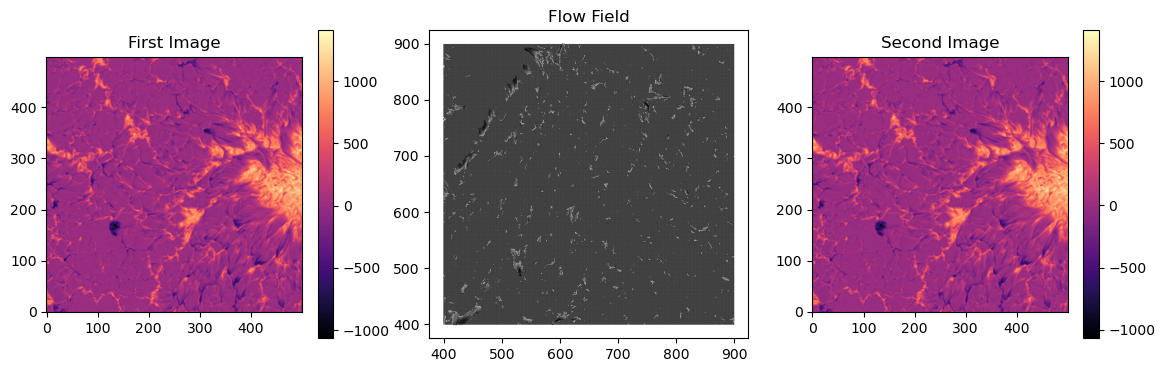

In [12]:
image1 = cube0[5, 400:, 400:] # magnetno polje
image2 = cube4[5, 400:, 400:]
#vel_x, vel_y, vm = pyflct.flct(image1, image2, 1, 1*16, 4.0) 
i_start = 400
i_end = 900
j_start = 400
j_end = 900

vx0 = cube0[2]
vx4 = cube4[2]
vy0 = cube0[3]
vy4 = cube4[3]
vx = (vx0 + vx4)/2/1e5
vy = (vy0 + vy4)/2/1e5
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 2500, 1)
Y = np.arange(0, 2500, 1)
U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image1[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           vx[i_start:i_end, j_start:j_end], vy[i_start:i_end, j_start:j_end])
ax2.set_title("Flow Field") #brzina iz simulacije

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image2[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image")
plt.colorbar()

<h1 style = "color:black; font-family: Times New Roman"> Malo parce mape</h1>

flct: nominal sliding box size = 40
flct: mean value of gamma^2/sigma^2 = 0.0418946

flct: finished


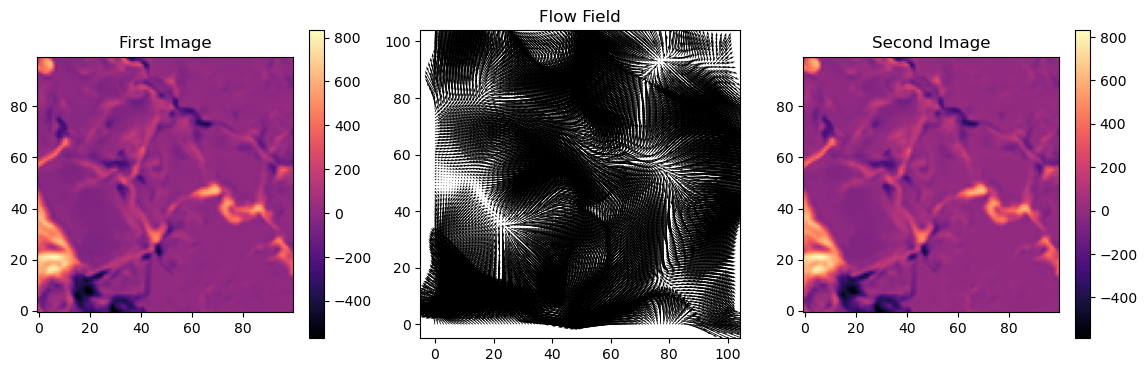

In [11]:
image1 = cube0[5, 400:, 400:] # magnetno polje
image2 = cube9[5, 400:, 400:]
vel_x, vel_y, vm = pyflct.flct(image1, image2, 1, 1*16, 10.0) 
i_start = 400
i_end = 500
j_start = 400
j_end = 500

# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
#X = np.arange(0, 2500, 1)
#Y = np.arange(0, 2500, 1)
#U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image1[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end])
ax2.set_title("Flow Field") #FLCT, scale 20 npr pokazuje da su indeed strelice 

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image2[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image")
plt.colorbar()

In [ ]:
# 4 i 5, 3 i 6, 2 i 7, 1 i 8, 0 i 9 snapshot
# na primeru 50x50 ispitati koliko se razlikuju brzine izmedju intervala, koristiti magnetno polje
# Kako se brzina dobija iz FLCT menja kada sirimo vremenski interval

# probati da se prostorno usrednje podaci, bin 2x2, pa na to primeniti tracking


<h1 style = "color: #e67e22; font-family: sans-serif ">Racunamo brzinu izmedju 4. i 5. snapshot-a</h1>

flct: nominal sliding box size = 40
flct: mean value of gamma^2/sigma^2 = 0.04117261647

flct: finished


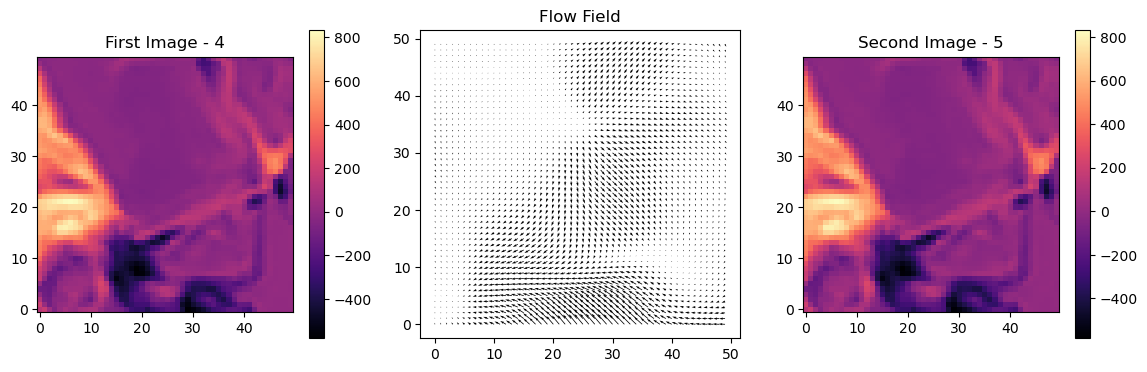

In [5]:
image1 = cube4[5, 400:, 400:] # magnetno polje
image2 = cube5[5, 400:, 400:]
vel_x45, vel_y45, vm45 = pyflct.flct(image1, image2, 1, 1*16, 10.0) 
i_start = 400
i_end = 450
j_start = 400
j_end = 450
# But first we need to create a meshgrid on which the flow field will be plotted 
#X = np.arange(0, 2500, 1)
#Y = np.arange(0, 2500, 1)
#U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image1[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - 4")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x45[i_start:i_end, j_start:j_end], vel_y45[i_start:i_end, j_start:j_end])
ax2.set_title("Flow Field") #FLCT, scale 20 npr pokazuje da su indeed strelice 

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image2[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - 5")
plt.colorbar()



<h1 style = "color:  #e6dd22; font-family: sans-serif ">Racunamo brzinu izmedju 3. i 6. snapshot-a</h1>

flct: nominal sliding box size = 40
flct: mean value of gamma^2/sigma^2 = 0.0412491

flct: finished


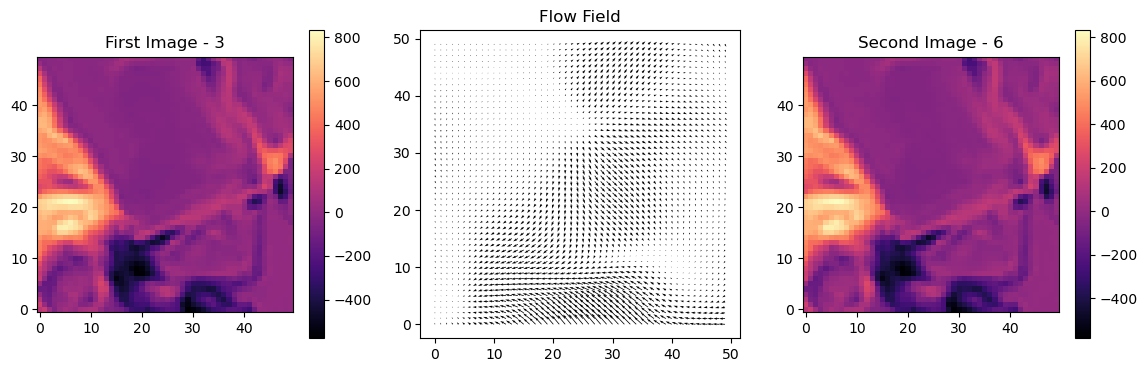

In [6]:
image1 = cube3[5, 400:, 400:] # magnetno polje
image2 = cube6[5, 400:, 400:]
vel_x36, vel_y36, vm36 = pyflct.flct(image1, image2, 1, 1*16, 10.0) 
i_start = 400
i_end = 450
j_start = 400
j_end = 450
# But first we need to create a meshgrid on which the flow field will be plotted 
#X = np.arange(0, 2500, 1)
#Y = np.arange(0, 2500, 1)
#U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image1[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - 3")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x36[i_start:i_end, j_start:j_end], vel_y36[i_start:i_end, j_start:j_end])
ax2.set_title("Flow Field") #FLCT, scale 20 npr pokazuje da su indeed strelice 

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image2[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - 6")
plt.colorbar()

<h1 style = "color: #1d8348; font-family: sans-serif ">Racunamo brzinu izmedju 2. i 7. snapshot-a</h1>

flct: nominal sliding box size = 40
flct: prog

flct: mean value of gamma^2/sigma^2 = 0.0413938

flct: finished


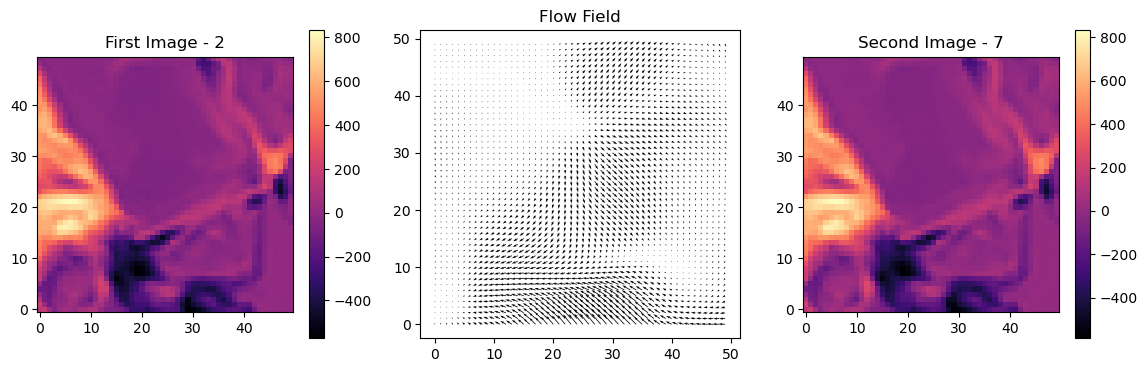

In [7]:
image1 = cube2[5, 400:, 400:] # magnetno polje
image2 = cube7[5, 400:, 400:]
vel_x27, vel_y27, vm27 = pyflct.flct(image1, image2, 1, 1*16, 10.0) 
i_start = 400
i_end = 450
j_start = 400
j_end = 450
# But first we need to create a meshgrid on which the flow field will be plotted 
#X = np.arange(0, 2500, 1)
#Y = np.arange(0, 2500, 1)
#U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image1[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - 2")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x27[i_start:i_end, j_start:j_end], vel_y27[i_start:i_end, j_start:j_end])
ax2.set_title("Flow Field") #FLCT, scale 20 npr pokazuje da su indeed strelice 

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image2[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - 7")
plt.colorbar()

<h1 style = "color:  #5d6d7e; font-family: sans-serif ">Racunamo brzinu izmedju 1. i 8. snapshot-a</h1>

flct: nominal sliding box size = 40
flct: progress  i = 669 ou

flct: mean value of gamma^2/sigma^2 = 0.0416107

flct: finished


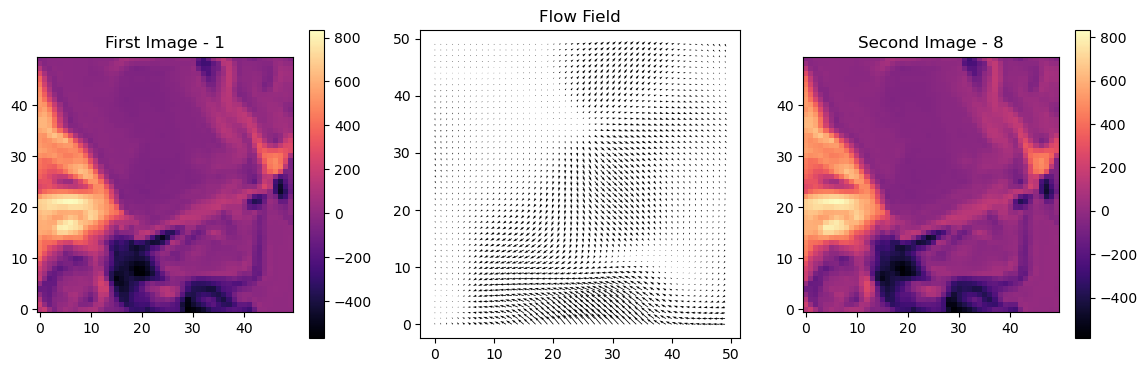

In [8]:
image1 = cube1[5, 400:, 400:] # magnetno polje
image2 = cube8[5, 400:, 400:]
vel_x18, vel_y18, vm18 = pyflct.flct(image1, image2, 1, 1*16, 10.0) 
i_start = 400
i_end = 450
j_start = 400
j_end = 450
# But first we need to create a meshgrid on which the flow field will be plotted 
#X = np.arange(0, 2500, 1)
#Y = np.arange(0, 2500, 1)
#U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image1[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - 1")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x18[i_start:i_end, j_start:j_end], vel_y18[i_start:i_end, j_start:j_end])
ax2.set_title("Flow Field") #FLCT, scale 20 npr pokazuje da su indeed strelice 

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image2[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - 8")
plt.colorbar()

<h1 style = "color:  #2471a3; font-family: sans-serif ">Racunamo brzinu izmedju 0. i 9. snapshot-a</h1>

flct: nominal sliding box size = 40
flct: progress

flct: mean value of gamma^2/sigma^2 = 0.0418946

flct: finished


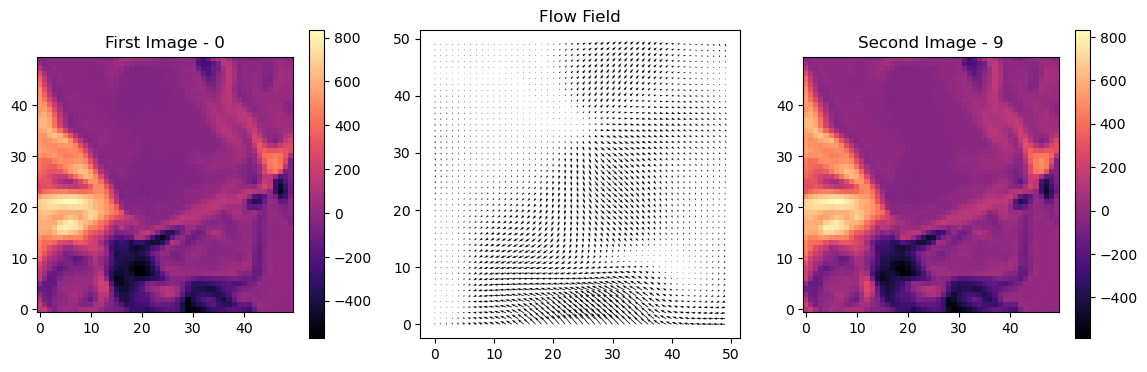

In [9]:
image1 = cube0[5, 400:, 400:] # magnetno polje
image2 = cube9[5, 400:, 400:]
vel_x09, vel_y09, vm09 = pyflct.flct(image1, image2, 1, 1*16, 10.0) 
i_start = 400
i_end = 450
j_start = 400
j_end = 450
# But first we need to create a meshgrid on which the flow field will be plotted 
#X = np.arange(0, 2500, 1)
#Y = np.arange(0, 2500, 1)
#U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image1[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - 0")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_x09[i_start:i_end, j_start:j_end], vel_y09[i_start:i_end, j_start:j_end])
ax2.set_title("Flow Field") #FLCT, scale 20 npr pokazuje da su indeed strelice 

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image2[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - 9")
plt.colorbar()

<h1 style = "color:  #4a235a; font-family:cursive">Proveravamo da li se brzina menja kako sirimo vremenski prozor</h1>

Text(0.5, 1.0, 'Flow Field 0 vs 9')

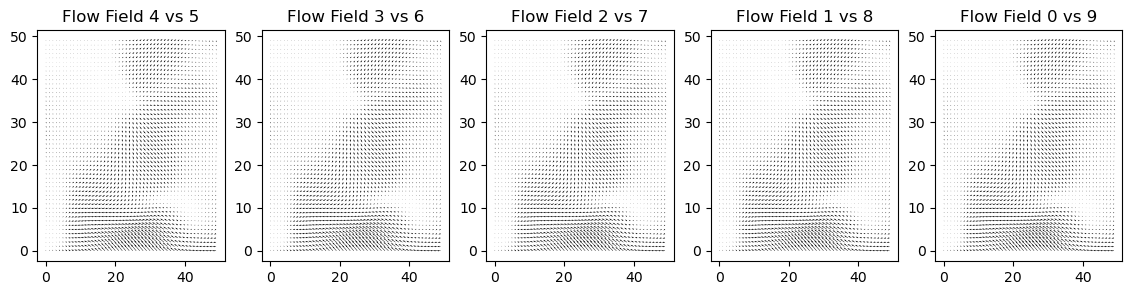

In [10]:
# Pravimo figure
fig = plt.figure(figsize=(14, 3))

# Plot 4 vs 5
ax1 = fig.add_subplot(151)
ax1.quiver(
           vel_x45[i_start:i_end, j_start:j_end], vel_y45[i_start:i_end, j_start:j_end])
ax1.set_title("Flow Field 4 vs 5") #FLCT, scale 20 npr pokazuje da su indeed strelice 

# Plot 3 vs 6
ax2 = fig.add_subplot(152)
ax2.quiver(
           vel_x36[i_start:i_end, j_start:j_end], vel_y36[i_start:i_end, j_start:j_end])
ax2.set_title("Flow Field 3 vs 6") #FLCT, scale 20 npr pokazuje da su indeed strelice 

# Plot 2 vs 7
ax3 = fig.add_subplot(153)
ax3.quiver(
           vel_x27[i_start:i_end, j_start:j_end], vel_y27[i_start:i_end, j_start:j_end])
ax3.set_title("Flow Field 2 vs 7") #FLCT, scale 20 npr pokazuje da su indeed strelice 

# Plot 1 vs 8
ax4 = fig.add_subplot(154)
ax4.quiver(
           vel_x18[i_start:i_end, j_start:j_end], vel_y18[i_start:i_end, j_start:j_end])
ax4.set_title("Flow Field 1 vs 8") #FLCT, scale 20 npr pokazuje da su indeed strelice 

# Plot 0 vs 9
ax5 = fig.add_subplot(155)
ax5.quiver(
           vel_x09[i_start:i_end, j_start:j_end], vel_y09[i_start:i_end, j_start:j_end])
ax5.set_title("Flow Field 0 vs 9") #FLCT, scale 20 npr pokazuje da su indeed strelice 


In [11]:
# Treba i numericki proveriti
# 4_5 vs 3_6
v11 = vel_x45 - vel_x36
v12 = vel_y45 - vel_y36
print(v11)
print(v12)

[[ 0.06509267  0.07006929  0.07556593 ...  0.02227848  0.0285105
   0.03368592]
 [ 0.06495292  0.07006454  0.07575916 ...  0.02713979  0.03269417
   0.03720941]
 [ 0.06532869  0.070727    0.07680234 ...  0.03108216  0.03600707
   0.0399157 ]
 ...
 [ 0.64718098  0.67474259  0.70168828 ... -0.33267074 -0.34519686
  -0.35677994]
 [ 0.67391795  0.70293121  0.73136092 ... -0.33917747 -0.35017972
  -0.36018384]
 [ 0.69302403  0.72328744  0.75301323 ... -0.34454148 -0.35366576
  -0.36175412]]
[[-0.00260364  0.00168612  0.00643833 ...  0.23871275  0.24693939
   0.25455999]
 [-0.00846075 -0.00338858  0.00221452 ...  0.24902203  0.25662363
   0.26359588]
 [-0.01540433 -0.00935797 -0.00270825 ...  0.25896092  0.26589862
   0.27219502]
 ...
 [-0.11974419 -0.10129419 -0.08407452 ... -0.06557003 -0.05773041
  -0.04937526]
 [-0.11250436 -0.09188094 -0.07251284 ... -0.04520501 -0.03659171
  -0.0274835 ]
 [-0.1092586  -0.08655707 -0.06506771 ... -0.02308677 -0.01375217
  -0.00397189]]


In [12]:
# 4_5 vs 2_7
v21 = vel_x45 - vel_x27
v22 = vel_y45 - vel_y27
print(v21)
print(v22)

[[ 0.13071034  0.14079157  0.15193847 ...  0.04718238  0.05972511
   0.07012576]
 [ 0.13026975  0.14063617  0.15219538 ...  0.05696668  0.0681453
   0.07721644]
 [ 0.1308518   0.14181046  0.15415098 ...  0.06490705  0.07481889
   0.08266846]
 ...
 [ 1.31185118  1.36859431  1.42418811 ... -0.67165963 -0.6970792
  -0.72062121]
 [ 1.36772136  1.42749477  1.48618742 ... -0.68436113 -0.70670248
  -0.72705683]
 [ 1.40788141  1.47025423  1.53164422 ... -0.69475181 -0.71328826
  -0.72976234]]
[[-0.0036144   0.00494515  0.0144012  ...  0.47685265  0.49359663
   0.50909278]
 [-0.01507907 -0.00494883  0.00621308 ...  0.4977394   0.51325519
   0.52747268]
 [-0.02870935 -0.01662388 -0.00336361 ...  0.51788754  0.53209829
   0.54498267]
 ...
 [-0.25704664 -0.22063489 -0.18666355 ... -0.12570018 -0.10969694
  -0.09267049]
 [-0.2426398  -0.20176886 -0.16338222 ... -0.08509017 -0.06756123
  -0.04905223]
 [-0.23598382 -0.19084703 -0.14810006 ... -0.04102459 -0.02208294
  -0.00226126]]


In [13]:
# Treba i numericki proveriti
# 4_5 vs 1_8
v31 = vel_x45 - vel_x18
v32 = vel_y45 - vel_y18
print(v31)
print(v32)

[[ 0.19514526  0.21015112  0.22674429 ...  0.06611459  0.08503005
   0.10075346]
 [ 0.19462151  0.2100488   0.22725572 ...  0.08093737  0.09780378
   0.11152833]
 [ 0.1955999   0.21190986  0.23028588 ...  0.09299783  0.10795931
   0.1198453 ]
 ...
 [ 2.01368614  2.10306383  2.1907414  ... -1.01446239 -1.05299824
  -1.08868838]
 [ 2.10189418  2.19641875  2.28938716 ... -1.03393321 -1.0678003
  -1.09864294]
 [ 2.16542552  2.26435739  2.36192556 ... -1.04986479 -1.07795428
  -1.1028913 ]]
[[-0.00720986  0.00569696  0.0199595  ...  0.7186469   0.7437332
   0.76694642]
 [-0.02438892 -0.00913491  0.00767738 ...  0.75015697  0.77340953
   0.79471015]
 [-0.04479015 -0.02661374 -0.00666466 ...  0.78055269  0.80185613
   0.82116234]
 ...
 [-0.403069   -0.34693264 -0.29442471 ... -0.19498217 -0.17104412
  -0.14555554]
 [-0.37955697 -0.31641098 -0.25695661 ... -0.13375578 -0.10748747
  -0.07972837]
 [-0.36795437 -0.29809579 -0.23177644 ... -0.0673123  -0.03887586
  -0.00909409]]


In [14]:
# Treba i numericki proveriti
# 4_5 vs 0_9
v41 = vel_x45 - vel_x09
v42 = vel_y45 - vel_y09
print(v41)
print(v42)

[[ 0.26091566  0.28089587  0.30299331 ...  0.08893502  0.11446302
   0.1356887 ]
 [ 0.25996131  0.2805193   0.30345526 ...  0.10892183  0.13170224
   0.15024379]
 [ 0.2609869   0.2827441   0.30726668 ...  0.12521536  0.14544006
   0.16151124]
 ...
 [ 2.76927358  2.89707052  3.0228338  ... -1.37066824 -1.42332034
  -1.47216652]
 [ 2.89522703  3.03090167  3.16481064 ... -1.39686721 -1.4431798
  -1.48543706]
 [ 2.9857613   3.12813857  3.26956251 ... -1.41822346 -1.45666944
  -1.49087897]]
[[-0.00855883  0.00857067  0.02749118 ...  0.9586957   0.99262937
   1.02399492]
 [-0.03107804 -0.01082283  0.01149117 ...  1.00111692  1.03264505
   1.06149068]
 [-0.0578753  -0.03372722 -0.00723653 ...  1.04204811  1.07101752
   1.09723465]
 ...
 [-0.56177929 -0.4854576  -0.41395847 ... -0.25889469 -0.22683457
  -0.19271695]
 [-0.52851171 -0.44223316 -0.36083732 ... -0.17716187 -0.14194919
  -0.10475561]
 [-0.53968849 -0.42383785 -0.32436142 ... -0.08844011 -0.05029091
  -0.01035292]]


In [15]:
# Treba i numericki proveriti
# 2_7 vs 1_8
v71 = vel_x27 - vel_x18
v72 = vel_y27 - vel_y18
print(v71)
print(v72)

[[ 0.06443492  0.06935955  0.07480582 ...  0.01893221  0.02530494
   0.0306277 ]
 [ 0.06435177  0.06941263  0.07506034 ...  0.0239707   0.02965848
   0.03431189]
 [ 0.0647481   0.0700994   0.0761349  ...  0.02809079  0.03314042
   0.03717684]
 ...
 [ 0.70183496  0.73446952  0.7665533  ... -0.34280276 -0.35591904
  -0.36806716]
 [ 0.73417281  0.76892398  0.80319974 ... -0.34957207 -0.36109782
  -0.37158611]
 [ 0.75754411  0.79410316  0.83028134 ... -0.35511298 -0.36466603
  -0.37312895]]
[[-0.00359546  0.00075181  0.0055583  ...  0.24179424  0.25013658
   0.25785364]
 [-0.00930984 -0.00418608  0.0014643  ...  0.25241758  0.26015434
   0.26723748]
 [-0.0160808  -0.00998986 -0.00330105 ...  0.26266515  0.26975784
   0.27617967]
 ...
 [-0.14602237 -0.12629775 -0.10776116 ... -0.06928199 -0.06134718
  -0.05288506]
 [-0.13691717 -0.11464212 -0.09357439 ... -0.0486656  -0.03992624
  -0.03067614]
 [-0.13197055 -0.10724876 -0.08367638 ... -0.02628771 -0.01679291
  -0.00683283]]


<p style = "color: #d98880; font-family:ui-rounded"> Brzine se menjanju, ali ne znacajno.</p>

<h1 style = "color: #0b5345 ; font-family:sans-serif">Prostorno usrednjavanje podataka</h1>

In [16]:
B_z_1 = cube2[5].flatten()
B_z_2 = cube7[5].flatten()

In [17]:
print(B_z_1)

[ -7.2266445  -3.9492977   1.2511694 ... -43.334133  -58.97848
 -29.303776 ]


In [19]:
np.shape(cube2[5])

(2048, 2048)

In [5]:
B1_view = cube2[5].reshape(1024,2,1024,2)

In [6]:
np.shape(B1_view)

(1024, 2, 1024, 2)

In [7]:
np.shape(B1_view.mean(axis=3).mean(axis=1))

(1024, 1024)

In [8]:
B1_mean = B1_view.mean(axis = 3).mean(axis = 1)
B2_view = cube7[5].reshape(1024,2,1024,2)
B2_mean = B2_view.mean(axis = 3).mean(axis = 1)

flct: nominal sliding box size = 40
flct: mean value of gamma^2/sigma^2 = 0.0209047

flct: finished


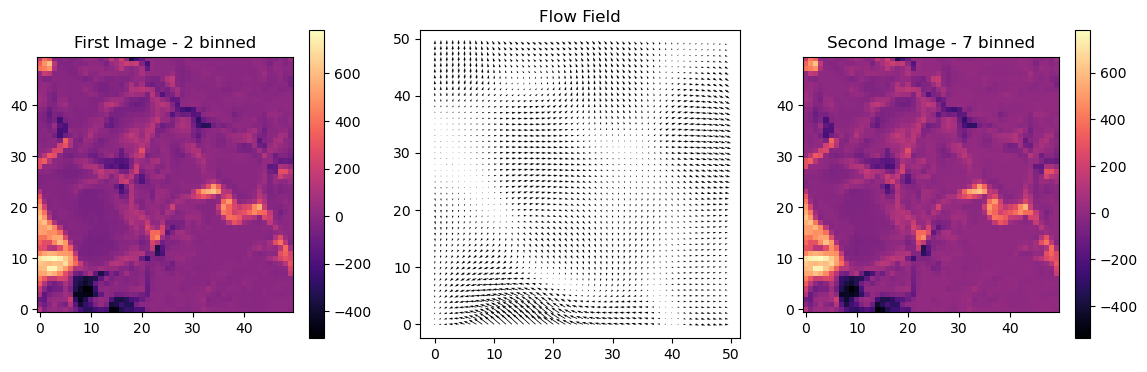

In [9]:
i_start = 400
i_end = 450
j_start = 400
j_end = 450

vel_xb, vel_yb, vmb = pyflct.flct(B1_mean, B2_mean, 1, 1*16, 10.0) 

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(B1_mean[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - 2 binned")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_xb[i_start:i_end, j_start:j_end], vel_yb[i_start:i_end, j_start:j_end])
ax2.set_title("Flow Field") #FLCT

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(B2_mean[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - 7 binned")
plt.colorbar()

In [12]:
def binArray(data, axis, binstep, binsize, func=np.nanmean):
    data = np.array(data)
    dims = np.array(data.shape)
    argdims = np.arange(data.ndim)
    argdims[0], argdims[axis]= argdims[axis], argdims[0]
    data = data.transpose(argdims)
    data = [func(np.take(data,np.arange(int(i*binstep),int(i*binstep+binsize)),0),0) for i in np.arange(dims[axis]//binstep)]
    data = np.array(data).transpose(argdims)
    return data
# Preuzeto sa https://stackoverflow.com/questions/21921178/binning-a-numpy-array/42024730#42024730

In [13]:
# Da vidimo da li funkcija daje isti rezultat
bin_mean2 = binArray(cube2[5], 0, 2, 2, np.mean)
bin_mean7 = binArray(cube7[5], 0, 2, 2, np.mean)

In [ ]:

i_start = 400
i_end = 450
j_start = 400
j_end = 450

vel_xbin, vel_ybin, vmbin = pyflct.flct(bin_mean2, bin_mean7, 1, 1*16, 10.0) 

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(bin_mean2[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First Image - 2 binned")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(
           vel_xbin[i_start:i_end, j_start:j_end], vel_ybin[i_start:i_end, j_start:j_end])
ax2.set_title("Flow Field") #FLCT

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(bin_mean7[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second Image - 7 binned")
plt.colorbar()

In [ ]:
# binovati brzine izmedju svaka dva, 1. i 2., 2. i 3., itd.
# zatim primeniti FLCT, pa usrednjiti
# Proveriti kako se takve brzine poklapaju, da li je Pearson-ov koeficijent veci

<h1 style = "color:gray; font-family:Times New Roman">Dalji rad na usrednjavanju podataka (21.1.2024.)</h1>

In [5]:
B0_view = cube0[5].reshape(1024, 2, 1024, 2)
B1_view = cube1[5].reshape(1024, 2, 1024, 2)

B01_mean = (B0_view + B1_view).mean(axis = 3).mean(axis = 1)

In [6]:
B2_view = cube2[5].reshape(1024, 2, 1024, 2)
B3_view = cube3[5].reshape(1024, 2, 1024, 2)
B4_view = cube4[5].reshape(1024, 2, 1024, 2)
B5_view = cube5[5].reshape(1024, 2, 1024, 2)
B6_view = cube6[5].reshape(1024, 2, 1024, 2)
B7_view = cube7[5].reshape(1024, 2, 1024, 2)
B8_view = cube8[5].reshape(1024, 2, 1024, 2)
B9_view = cube9[5].reshape(1024, 2, 1024, 2)

In [7]:
B12_mean = (B1_view + B2_view).mean(axis = 3).mean(axis = 1)
B23_mean = (B2_view + B3_view).mean(axis = 3).mean(axis = 1)
B34_mean = (B3_view + B4_view).mean(axis = 3).mean(axis = 1)
B45_mean = (B4_view + B5_view).mean(axis = 3).mean(axis = 1)
B56_mean = (B5_view + B6_view).mean(axis = 3).mean(axis = 1)
B67_mean = (B6_view + B7_view).mean(axis = 3).mean(axis = 1)
B78_mean = (B7_view + B8_view).mean(axis = 3).mean(axis = 1)
B89_mean = (B8_view + B9_view).mean(axis = 3).mean(axis = 1)

In [8]:
# FLCT primeniti na usrednjene podatke??
# Sta sve usrednjiti?
# Izmedju svaka dva frame-a izracunati horizontalne brzine i usrednjiti, pa to uporediti
# sa realnim brzinama - nece nuzno povecati rezoluciju, ali ce dati framework
# Primenjujemo FLCT na gornja magnetna polja
vel_x123, vel_y123, vm123 = pyflct.flct(B12_mean, B23_mean, 1, 1*16, 10.0) 


flct: nominal sliding box size = 40


In [9]:
vel_x234, vel_y234, vm234 = pyflct.flct(B23_mean, B34_mean, 1, 1*16, 10.0) 

flct: progress  i = 419 ou

flct: progress

flct: mean value of gamma^2/sigma^2 = 0.0208607

flct: finished
flct: nominal sliding box size = 40


flct: pr

In [10]:
vel_x345, vel_y345, vm345 = pyflct.flct(B34_mean, B45_mean, 1, 1*16, 10.0) 

flct: mean value of gamma^2/sigma^2 = 0.0208604

flct: finished
flct: nominal sliding box size = 40
flct: mean value of gamma^2/sigma^2 = 0.02086

flct: finished


In [11]:
vel_x456, vel_y456, vm456 = pyflct.flct(B45_mean, B56_mean, 1, 1*16, 10.0) 

flct: nominal sliding box size = 40


flct: prog

In [12]:
vel_x567, vel_y567, vm567 = pyflct.flct(B56_mean, B67_mean, 1, 1*16, 10.0)

flct: mean value of gamma^2/sigma^2 = 0.0208595

flct: finished
flct: nominal sliding box size = 40


flct: mean value of gamma^2/sigma^2 = 0.0208589

flct: finished


In [13]:
vel_x678, vel_y678, vm678 = pyflct.flct(B67_mean, B78_mean, 1, 1*16, 10.0) 

flct: nominal sliding box size = 40


flct: mean value of gamma^2/sigma^2 = 0.0208584

flct: finished


In [14]:
vel_x789, vel_y789, vm789 = pyflct.flct(B78_mean, B89_mean, 1, 1*16, 10.0) 

flct: nominal sliding box size = 40
flct: mean value of gamma^2/sigma^2 = 0.0208579

flct: finished


In [17]:
np.shape(vel_x789)

flct: mean value of gamma^2/sigma^2 = 0.0208584

flct: finished


(1024, 1024)

In [15]:
# Ucitavamo brzine iz simulacija
vx0 = cube0[2].reshape(1024, 2, 1024, 2)
vy0 = cube0[3].reshape(1024, 2, 1024, 2)

vx1 = cube1[2].reshape(1024, 2, 1024, 2)
vy1 = cube1[3].reshape(1024, 2, 1024, 2)

vx2 = cube2[2].reshape(1024, 2, 1024, 2)
vy2 = cube2[3].reshape(1024, 2, 1024, 2)

vx3 = cube3[2].reshape(1024, 2, 1024, 2)
vy3 = cube3[3].reshape(1024, 2, 1024, 2)

vx4 = cube4[2].reshape(1024, 2, 1024, 2)
vy4 = cube4[3].reshape(1024, 2, 1024, 2)

vx5 = cube5[2].reshape(1024, 2, 1024, 2)
vy5 = cube5[3].reshape(1024, 2, 1024, 2)

vx6 = cube6[2].reshape(1024, 2, 1024, 2)
vy6 = cube6[3].reshape(1024, 2, 1024, 2)

vx7 = cube7[2].reshape(1024, 2, 1024, 2)
vy7 = cube7[3].reshape(1024, 2, 1024, 2)

vx8 = cube8[2].reshape(1024, 2, 1024, 2)
vy8 = cube8[3].reshape(1024, 2, 1024, 2)

vx9 = cube9[2].reshape(1024, 2, 1024, 2)
vy9 = cube9[3].reshape(1024, 2, 1024, 2)

In [17]:
# Usrednjimo ove brzine
vx01 = (vx0 + vx1).mean(axis = 3).mean(axis = 1)/1e5
vy01 = (vy0 + vy1).mean(axis = 3).mean(axis = 1)/1e5

vx12 = (vx1 + vx2).mean(axis = 3).mean(axis = 1)/1e5
vy12 = (vy1 + vy2).mean(axis = 3).mean(axis = 1)/1e5

vx23 = (vx2 + vx3).mean(axis = 3).mean(axis = 1)/1e5
vy23 = (vy2 + vy3).mean(axis = 3).mean(axis = 1)/1e5

vx34 = (vx3 + vx4).mean(axis = 3).mean(axis = 1)/1e5
vy34 = (vy3 + vy4).mean(axis = 3).mean(axis = 1)/1e5

vx45 = (vx4 + vx5).mean(axis = 3).mean(axis = 1)/1e5
vy45 = (vy4 + vy5).mean(axis = 3).mean(axis = 1)/1e5

vx56 = (vx5 + vx6).mean(axis = 3).mean(axis = 1)/1e5
vy56 = (vy5 + vy6).mean(axis = 3).mean(axis = 1)/1e5

vx67 = (vx6 + vx7).mean(axis = 3).mean(axis = 1)/1e5
vy67 = (vy6 + vy7).mean(axis = 3).mean(axis = 1)/1e5

vx78 = (vx7 + vx8).mean(axis = 3).mean(axis = 1)/1e5
vy78 = (vy7 + vy8).mean(axis = 3).mean(axis = 1)/1e5

vx89 = (vx8 + vx9).mean(axis = 3).mean(axis = 1)/1e5
vy89 = (vy8 + vy9).mean(axis = 3).mean(axis = 1)/1e5


In [27]:
np.shape(vx12)

(1024, 1024)

In [18]:
# Da li je korelacija izmedju binovanih magnetnih polja koja su usrednjena, pa na takve primenjen FLCT i
# i usrednjenih brzina iz simulacije bolja od prethodnih rezultata?

from scipy.stats import pearsonr
r12x = pearsonr(vel_x123.flatten(), vx12.flatten())
print(r12x)

r12y = pearsonr(vel_y123.flatten(), vy12.flatten())
print(r12y)

(0.3894101785384163, 0.0)
(0.39847620125952116, 0.0)


In [19]:
r23x = pearsonr(vel_x234.flatten(), vx23.flatten())
print(r23x)

r23y = pearsonr(vel_y234.flatten(), vy23.flatten())
print(r23y)

(0.3896302774367977, 0.0)
(0.3985472496955138, 0.0)


In [20]:
r67x = pearsonr(vel_x678.flatten(), vx67.flatten())
print(r67x)

r67y = pearsonr(vel_y678.flatten(), vy67.flatten())
print(r67y)

(0.3899074950573485, 0.0)
(0.39935704516164117, 0.0)


<h1 style = "color:darkgreen; font-family:Times New Roman"> Konvolucija sa gausijanom i da li se povecava korelacija</h1>

[ 1.02457639  4.978328   -1.94474027]


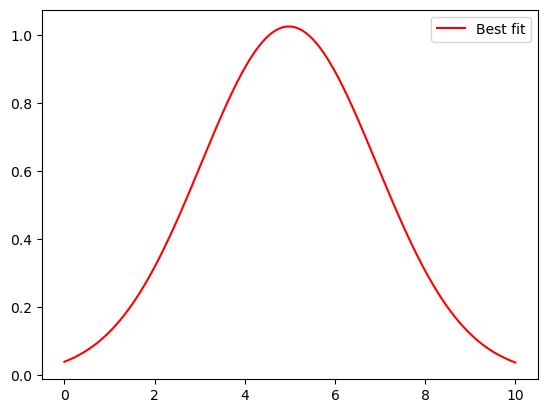

In [21]:
from scipy import signal
from scipy import stats
from scipy.optimize import curve_fit 

def func(x, a, x0, sigma): 
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) 

# Kreiramo gausijan 
x = np.linspace(0, 10, 1024) 
y = func(x, 1, 5, 2) 
yn = y + 0.2 * np.random.normal(size=len(x)) 
popt, pcov = curve_fit(func, x, yn) 
  
#popt returns the best fit values for parameters of the given model (func) 
print (popt) 
  
ym = func(x, popt[0], popt[1], popt[2]) 
plt.plot(x, ym, c='r', label='Best fit') 
plt.legend() 


In [15]:
vx01.shape

(1024, 1024)

In [18]:
ym.shape

(1024,)

In [22]:
# Konvoluiramo brzinu koje je FLCT odredio sa gornjim gausijanom
# Konvoluiramo brzinu iz simulacije sa gornjim gausijanom
# Nakon toga trazimo da li se povecala korelacija
filtered01 = signal.convolve(vx01.flatten(), ym, mode='same') 
filtered_flct01 = signal.convolve(vel_x123.flatten(), ym, mode="same") 

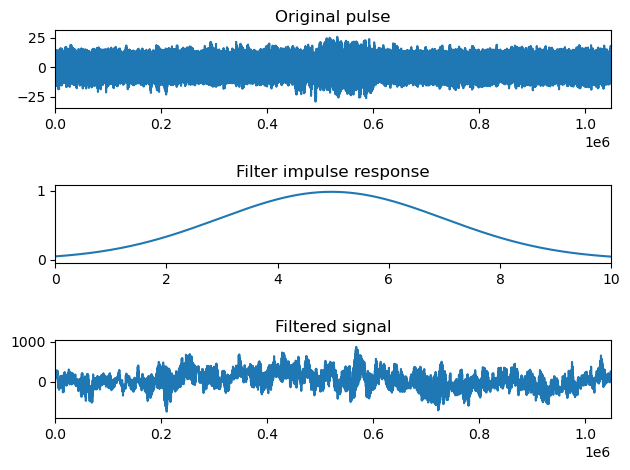

In [39]:


fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1)

ax_orig.plot(vx01.flatten())

ax_orig.set_title('Original pulse')

ax_orig.margins(0, 0.1)

ax_win.plot(x,ym)

ax_win.set_title('Filter impulse response')

ax_win.margins(0, 0.1)

ax_filt.plot(filtered01)

ax_filt.set_title('Filtered signal')

ax_filt.margins(0, 0.1)

fig.tight_layout()


In [30]:
from scipy.stats import pearsonr
p = pearsonr(filtered01, filtered_flct01)
print(p)

(0.8218305009973742, 0.0)


/tmp/ipykernel_3352/1173678562.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(filtered01, filtered_flct01, s=25, cmap=plt.cm.coolwarm, zorder=10)


(-1395.4373301734306, 1553.8155436051918)

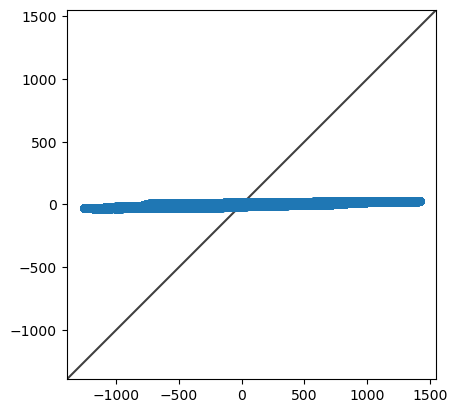

In [31]:
# Plotujemo 
fig, ax = plt.subplots()
ax.scatter(filtered01, filtered_flct01, s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

In [24]:
filtered01 = signal.convolve(vy01.flatten(), ym, mode='same') 
filtered_flct01 = signal.convolve(vel_y123.flatten(), ym, mode="same") 
p = pearsonr(filtered01, filtered_flct01)
print(p)

(0.8218305009973742, 0.0)


In [32]:
filtered12 = signal.convolve(vx12.flatten(), ym, mode='same') 
filtered_flct12 = signal.convolve(vel_x234.flatten(), ym, mode="same") 
p = pearsonr(filtered12, filtered_flct12)
print(p)

(0.7115586424924147, 0.0)


/tmp/ipykernel_3352/1422692281.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(filtered12, filtered_flct12, s=25, cmap=plt.cm.coolwarm, zorder=10)


(-868.4353691937005, 985.7435558142917)

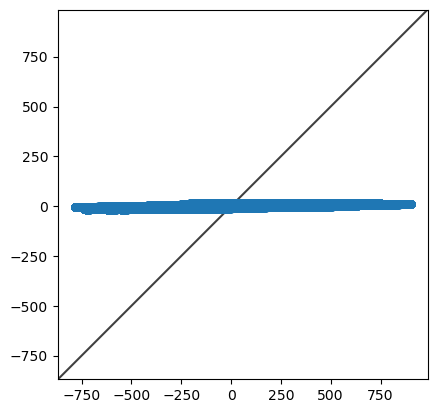

In [33]:
# Plotujemo 
fig, ax = plt.subplots()
ax.scatter(filtered12, filtered_flct12, s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

In [35]:
filtered12 = signal.convolve(vy12.flatten(), ym, mode='same') 
filtered_flct12 = signal.convolve(vel_y234.flatten(), ym, mode="same") 
p = pearsonr(filtered12, filtered_flct12)
print(p)

(0.821880331349949, 0.0)


/tmp/ipykernel_3352/1422692281.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(filtered12, filtered_flct12, s=25, cmap=plt.cm.coolwarm, zorder=10)


(-1394.1049920812875, 1551.745808468934)

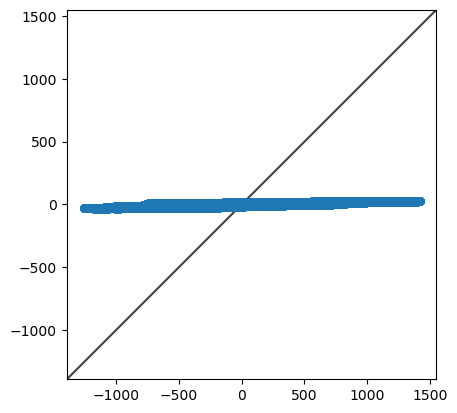

In [36]:
# Plotujemo 
fig, ax = plt.subplots()
ax.scatter(filtered12, filtered_flct12, s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

In [27]:
filtered56 = signal.convolve(vx56.flatten(), ym, mode='same')
filtered_flct56 = signal.convolve(vel_x567.flatten(), ym, mode='same')
p = pearsonr(filtered56, filtered_flct56)
print(p)

(0.7109951886830342, 0.0)


In [28]:
filtered56 = signal.convolve(vy56.flatten(), ym, mode='same')
filtered_flct56 = signal.convolve(vel_y567.flatten(), ym, mode='same')
p = pearsonr(filtered56, filtered_flct56)
print(p)

(0.8219109185604183, 0.0)


/tmp/ipykernel_3352/1340815864.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(filtered56, filtered_flct56, s=25, cmap=plt.cm.coolwarm, zorder=10)


(-1388.6683799408154, 1543.4081585698257)

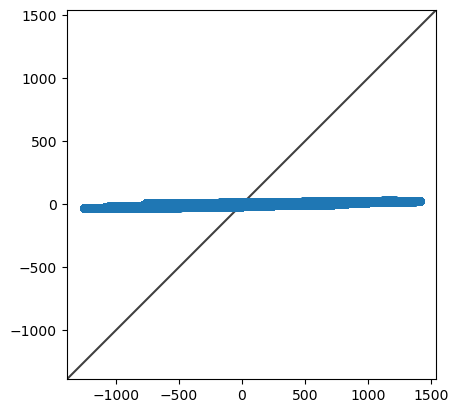

In [29]:
# Plotujemo 
fig, ax = plt.subplots()
ax.scatter(filtered56, filtered_flct56, s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

In [37]:
filtered78 = signal.convolve(vx78.flatten(), ym, mode='same')
filtered_flct78 = signal.convolve(vel_x789.flatten(), ym, mode='same')
p = pearsonr(filtered78, filtered_flct78)
print(p)

(0.7105984099339588, 0.0)


/tmp/ipykernel_3352/1290170470.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(filtered78, filtered_flct78, s=25, cmap=plt.cm.coolwarm, zorder=10)


(-852.7884023988865, 977.3720231811901)

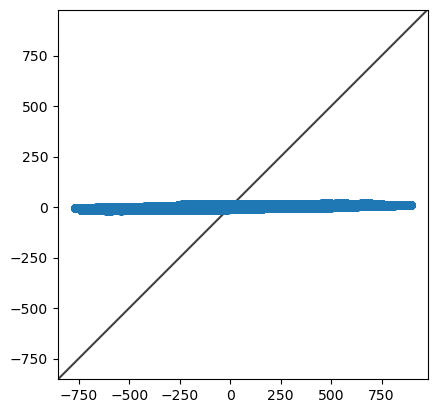

In [38]:
# Plotujemo 
fig, ax = plt.subplots()
ax.scatter(filtered78, filtered_flct78, s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

In [39]:
filtered78 = signal.convolve(vy78.flatten(), ym, mode='same')
filtered_flct78 = signal.convolve(vel_y789.flatten(), ym, mode='same')
p = pearsonr(filtered78, filtered_flct78)
print(p)

(0.8214962728029708, 0.0)


/tmp/ipykernel_3352/2545820820.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(filtered78, filtered78-filtered_flct78, s=25, cmap=plt.cm.coolwarm, zorder=10)


(-1385.9474053034685, 1539.2377258069964)

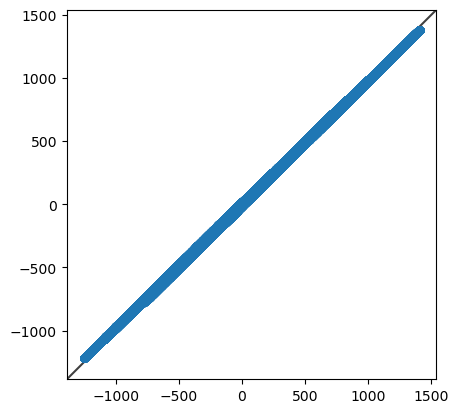

In [45]:
# Plotujemo 
fig, ax = plt.subplots()
ax.scatter(filtered78, filtered78-filtered_flct78, s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)